<a href="https://colab.research.google.com/github/dhanusharer/ML/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LINEAR REGRESSION***

In [ ]:
import pandas as pd
data={'area':[2600,3000,3200,3600,4000],'price':[550000,565000,610000,680000,725000]}
df=pd.DataFrame(data)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

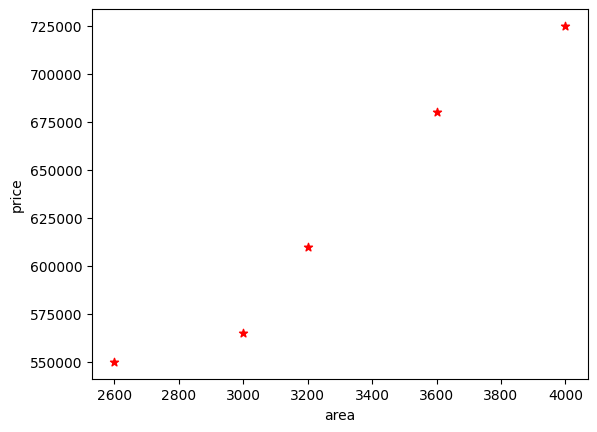

In [ ]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='*')


In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)


LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

np.float64(180616.43835616432)

**example 1: pre capita income prediction**

In [ ]:
df = pd.read_csv('/content/canada_per_capita_income.csv')
df.head()

NameError: name 'pd' is not defined

In [ ]:
reg_income = linear_model.LinearRegression()
reg_income.fit(df[['year']], df['per capita income (US$)'])


In [ ]:
predicted_income_2025 = reg_income.predict([[2025]])
print(f"Predicted per capita income for 2025: {predicted_income_2025[0]:,.2f} US$")


In [ ]:
import pandas as pd
import numpy as np

data = {
    'experience': [np.nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
    'test_score(out of 10)': [8, 6, 10, 9, 7, np.nan, 8],
    'interview_score(out of 10)': [9, 6, 10, 6, 10, 7, 8],
    'salary($)': [50000, 45000, 70000, 65000, 62000, 72000, 80000]
}

d = pd.DataFrame(data)
d

In [ ]:
d.experience=d.experience.fillna("zero")
d

In [ ]:
from word2number import w2n

In [ ]:
!pip install word2number as w2n

In [ ]:
d.experience = d.experience.astype(str).apply(w2n.word_to_num)


In [ ]:
import math
median_test_score=math.floor(d['test_score(out of 10)'].mean())
median_test_score

In [ ]:
d['test_score(out of 10)']=d['test_score(out of 10)'].fillna(median_test_score)
d

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']], d['salary($)'])

In [ ]:
reg.predict()

# ***LOGISTIC REGRESSION***

In [ ]:
import pandas as pd

data = {
    'age': [22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29, 49, 55, 25, 58, 19, 18, 21, 26, 40, 45, 50, 54, 23],
    'bought_insurance': [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
}

df = pd.DataFrame(data)
print(df)


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df.head()

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
df.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.25)

In [ ]:
x_test

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

**logistic regression example:HR**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("giripujar/hr-analytics")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd
import os

# Assuming the CSV file is named 'HR_comma_sep.csv' within the downloaded path
file_path = os.path.join(path, 'HR_comma_sep.csv')
df = pd.read_csv(file_path)

left=df[df.left==1]
left.shape

In [ ]:
retained=df[df.left==0]
retained.shape


In [ ]:
df.groupby('left').mean(numeric_only=True)

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [ ]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()


In [ ]:
salary_dummies=pd.get_dummies(subdf.salary,prefix="salary")

In [ ]:
df_with_dummies=pd.concat([subdf,salary_dummies],axis='columns')

In [ ]:
df_with_dummies.head()

In [ ]:
df_with_dummies.drop('salary',axis='columns',inplace=True)

In [ ]:
X=df_with_dummies

In [ ]:
Y=df.left

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

**Logitic regression example:predict the numeber**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [ ]:
dir(digits)

In [ ]:
digits.data[0]

In [ ]:
plt.gray()
plt.matshow(digits.images[0])

In [ ]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [ ]:
digits.target[0:5]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.score(X_train,y_train)

In [ ]:
plt.matshow(digits.images[1736])

In [ ]:
digits.target[1736]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Digit Classification')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_predicted)
cm

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
df

In [ ]:
X = iris.data
y = iris.target


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
import numpy as np
y_pred_class=np.round(y_pred)

In [ ]:
new_data = [[6, 3, 5, 3]]
pred = lr.predict(new_data)
pred_class = round(pred[0])

print("Predicted class:", pred_class)
print("Species:", iris.target_names[pred_class])


In [ ]:
df

In [ ]:
lr.score(X_train,y_train)

# ***DECISION TREE***

In [ ]:
import pandas as pd

data = {
    'company': [
        'google','google','google','google','google','google','google',
        'abc pharma','abc pharma','abc pharma','abc pharma',
        'facebook','facebook','facebook','facebook','facebook','facebook'
    ],
    'job': [
        'sales executive','sales executive','business manager','business manager',
        'computer programmer','computer programmer','computer programmer',
        'sales executive','computer programmer','business manager','business manager',
        'sales executive','business manager','business manager',
        'computer programmer','computer programmer','computer programmer'
    ],
    'degree': [
        'bachelors','masters','bachelors','masters','bachelors','masters','bachelors',
        'masters','bachelors','bachelors','masters',
        'bachelors','masters','bachelors','masters','bachelors','masters'
    ],
    'salary_more_than_100k': [
        0,0,1,1,0,0,1,
        0,0,0,1,
        0,1,1,1,1,1
    ]
}

df = pd.DataFrame(data)
df


In [ ]:
df.head()

In [ ]:
from sklearn import tree

In [ ]:
model=tree.DecisionTreeClassifier()

In [ ]:
inputs=df.drop('salary_more_than_100k',axis='columns')

In [ ]:
target=df['salary_more_than_100k']

In [ ]:
target


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [ ]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_company.fit_transform(inputs['degree'])
inputs.head(16)

In [ ]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')
inputs_n

In [ ]:
model.fit(inputs_n,target)

In [ ]:
model.score(inputs_n,target)

In [ ]:
model.predict([[1,0,1]])

In [ ]:
# Cell 1 — imports (run first)
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', 50)


In [ ]:
# Cell 2A — load from given path (may not exist in Colab unless you upload it)
path = '/content/titanic.csv'
df = pd.read_csv(path)
df.head()

In [ ]:
display(df.isnull().sum())

In [ ]:
df_clean=df.copy()

In [ ]:
df_clean['Age'].fillna(df_clean['Age'].median(),inplace=True)

In [ ]:
df_clean.fillna(df_clean['Embarked'].mode(),inplace=True)

In [ ]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [ ]:

le_sex=LabelEncoder()
df_clean['Sex']=le_sex.fit_transform(df_clean['Sex'])

In [ ]:
le_emb = LabelEncoder()
df_clean['Embarked'] = le_emb.fit_transform(df_clean['Embarked'])

In [ ]:
display(df_clean.isnull().sum())


In [ ]:
df_clean.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis='columns',inplace=True)

In [ ]:
display(df_clean.isnull().sum())


In [ ]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = df_clean[features]
y = df_clean['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)


In [ ]:
dt.score(X_test, y_test)

In [ ]:
# Cell 7 — evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Survived','Survived'])

print(f"Accuracy: {acc:.4f}\n")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Pretty confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Not Surv','Pred Surv'],
            yticklabels=['True Not Surv','True Surv'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Cell 8 — visualize tree
plt.figure(figsize=(18,10))
plot_tree(dt, feature_names=features, class_names=['Not Survived','Survived'],
          filled=True, rounded=True, fontsize=10)
plt.show()


In [ ]:
# Cell 9 — feature importance
fi = pd.Series(dt.feature_importances_, index=features).sort_values(ascending=False)
print(fi)

# Bar plot
fi.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance')
plt.show()


In [ ]:
# Cell 10 — try different max_depths quickly
for depth in [2, 3, 4, 5, 7, None]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("max_depth =", depth, " -> test accuracy:", f"{score:.4f}")


In [ ]:
# Cell 12 — predict sample
# Example: Pclass=3, Sex='male', Age=22, SibSp=1, Parch=0, Fare=7.25, Embarked='S'
sample = {
    'Pclass': [3],
    'Sex': [le_sex.transform(['male'])[0]],        # encode
    'Age': [22],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [le_emb.transform(['S'])[0]]       # encode
}
sample_df = pd.DataFrame(sample)
pred = dt.predict(sample_df)[0]
print("Predicted label (0=NotSurvived,1=Survived):", pred)


# **SVC**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target

In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df['flower']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [ ]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


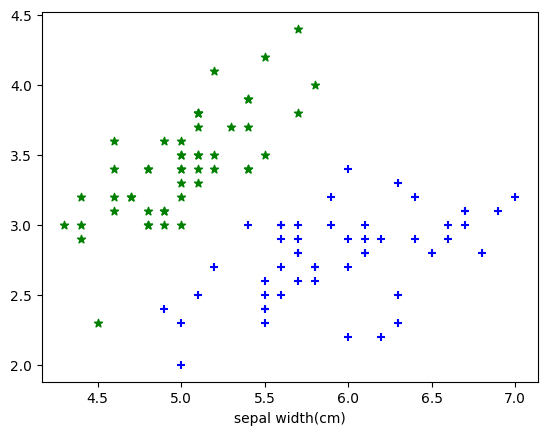

In [ ]:
plt.xlabel('sepal lenght (cm)')
plt.xlabel('sepal width(cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='*')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(['target','flower'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y=df['target']
Y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()
model.fit(X_train,Y_train)

SVC()

In [ ]:
model.score(X_test,Y_test)

0.9333333333333333

# ***RANDOM FOREST***

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


<Figure size 640x480 with 0 Axes>

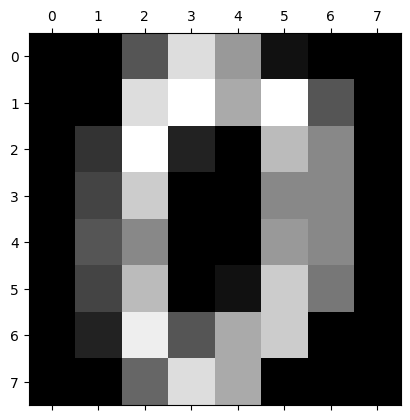

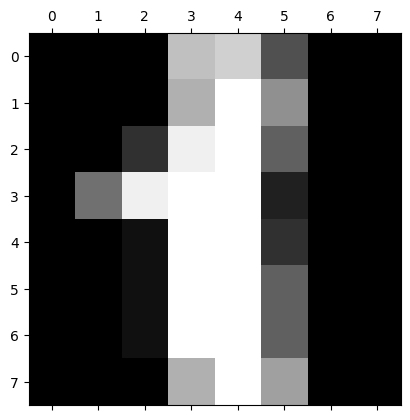

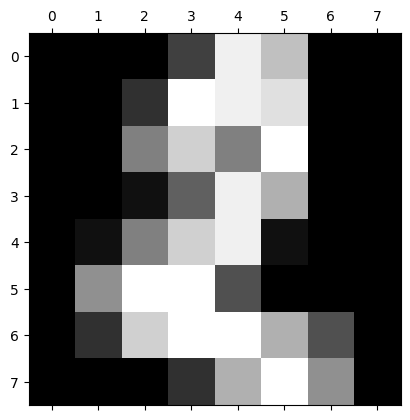

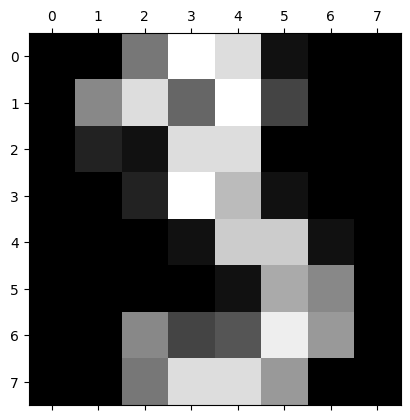

In [ ]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [ ]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop('target',axis='columns')

In [ ]:
Y=df['target']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test,Y_test)

0.975

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 36]])

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop('target',axis='columns')

In [ ]:
Y=iris.target

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
model.score(X_test,Y_test)

0.9666666666666667

In [ ]:
model.predict([[5.1,4,6,3]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
cm=confusion_matrix(Y_test,y_pred)
cm

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(digits.data,digits.target,train_size=0.2)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1198, 359]

In [ ]:
svm=SVC()
svm.fit(X_train,Y_train)
svm.score(X_test,Y_test)


0.9645340751043116

In [ ]:
rm=RandomForestClassifier()
rm.fit(X_train,Y_train)
rm.score(X_test,Y_test)

0.9304589707927677

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def get_score(model,X_train,X_test,Y_train,Y_test):
  model.fit(X_train,Y_train)
  return model.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=3)

In [ ]:
scores_lr = []
scores_svm = []
scores_rm = []

for train_index, test_index in kf.split(digits.data):
    X_train, X_test = digits.data[train_index], digits.data[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]

    scores_lr.append(
        get_score(LogisticRegression(), X_train, X_test, y_train, y_test)
    )

    scores_svm.append(
        get_score(SVC(), X_train, X_test, y_train, y_test)
    )

    scores_rm.append(
        get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)
    )

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
scores_lr

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [ ]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [ ]:
scores_rm

[0.9348914858096828, 0.9549248747913188, 0.9198664440734557]

# ***K MEAN CLUSTURED ALGORITHM***

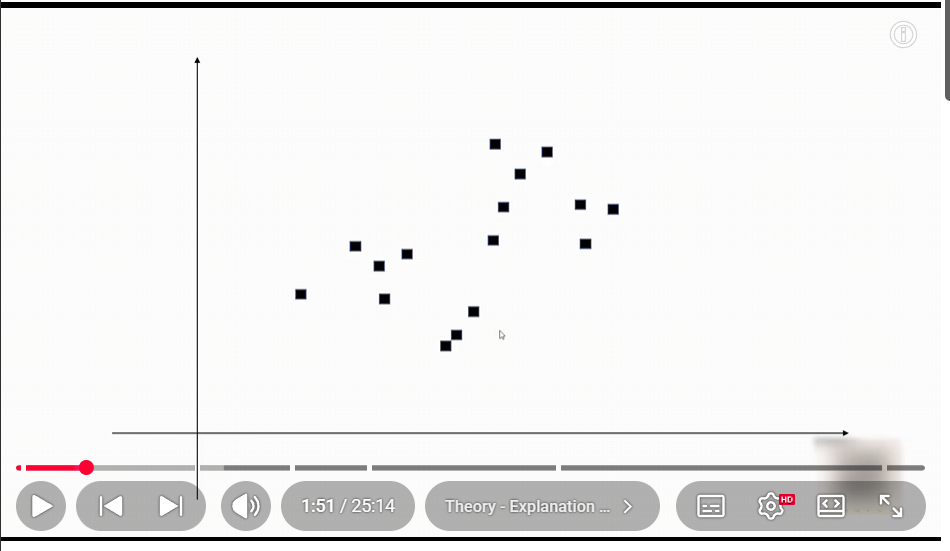

*`plot random points acc to data`*

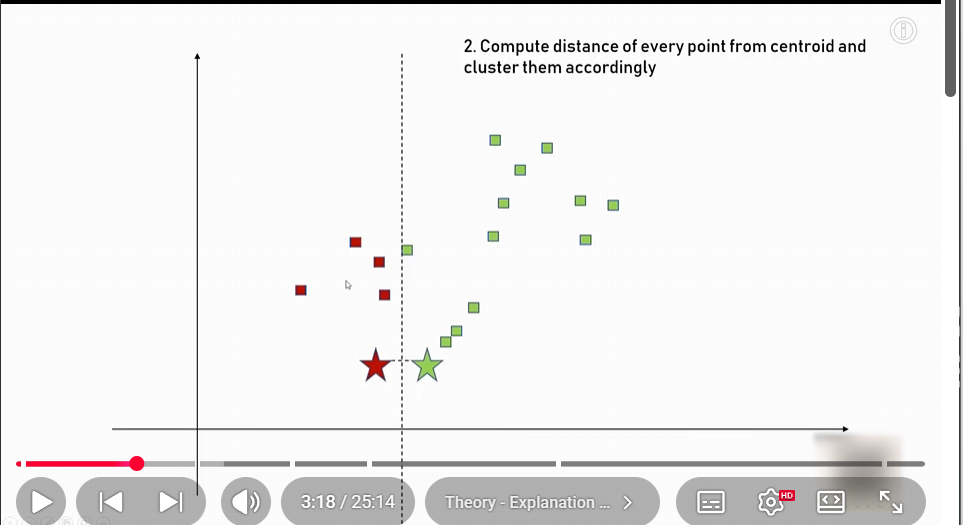

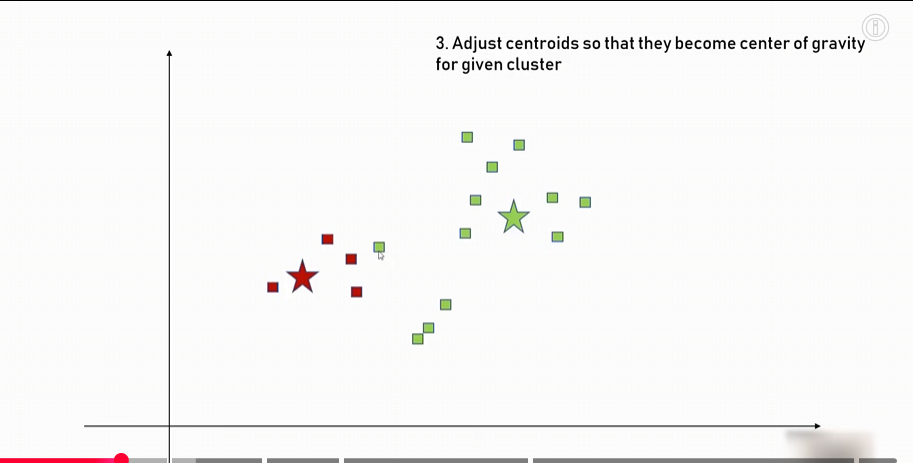

**how to determine number of clusters(K)**

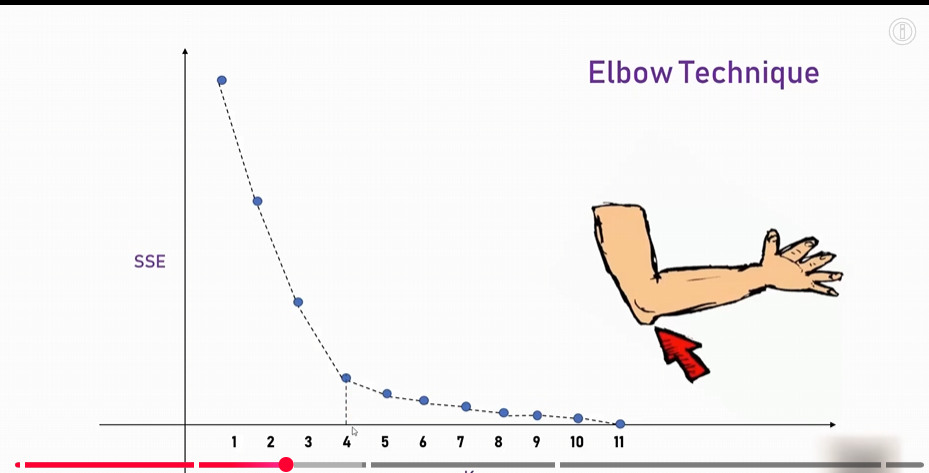

here 1,2,3 are number of clusters